<a href="https://colab.research.google.com/github/hurshd0/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/LSDS_Unit_1_Sprint_1_Notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Notes on what we studied for this sprint, common code snippets used, 

# Dealing with Data

###A First Look at Data

#### Types of variables

- Continuous: can take any real value (in an interval)
$$
x \in R, a \leq x \leq b
$$

- Discrete: can take a value from enumerated set or particular values, can also be categorical like number of oranges, males or females, etc...
  - Ordinal: set has natural ordering, we can tell direction of the difference but not the size of the difference
    - Ratings scale (1 - 5), etc...
  - Nominal / Categorical: set has no natural ordering
    - Music genres, Film genres, etc..
 

In [0]:
#################### BOILER PLATE ###################
%matplotlib inline

import numpy as np # Linear algebra lib
import pandas as pd # Data analysis lib
import matplotlib.pyplot as plt # plotting lib
import seaborn as sns # matplotlib wrapper plotting lib
import random # python random lib

# Matplotlib and Seaborn params
from matplotlib import rcParams
rcParams['figure.figsize'] = 10, 6

# Removes rows and columns truncation of '...'
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

# Set folder path --- Optional
#import sys
#sys.path.append('')

#######################################################

### Part 1. Loading Data from 🐼

Pandas can load data from popular data sources like:

 - Flat file (e.g. spreadsheets, csv, tsv)
 - Databases (SQL)
 - Log files
 - APIs
 - Other raw sources, like HTML


Loading data from multiple sources into a Python notebook using `read_csv`
  - directly from `csv` url
  - !curl method
  - CSV upload method
  
> #### IMP pandas documentation links
  
- [`read_csv`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)
-[`series methods`](https://pandas.pydata.org/pandas-docs/stable/reference/series.html#indexing-iteration)
-[`dataframe methods`](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html)
-[`pd.Series.fillna`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.fillna.html?highlight=fillna#pandas.Series.fillna)
-[`pd.DataFrame.fillna`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html?highlight=fillna#pandas.DataFrame.fillna)
-[`time series`](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html)
-[`pd.crosstab`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html#pandas.crosstab)
-[`pd.cut`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html#pandas.cut)


In [0]:
autoprice_data_url = 'https://raw.githubusercontent.com/hurshd0/DS-Unit-1-Sprint-1-Dealing-With-Data/master/datasets/Automobile%20price%20data.csv'
df = pd.read_csv(autoprice_data_url)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


`curl <URL PATH>` -> outputs csv file  
`curl <URL PATH> | wc -l` -> gets number of rows in dataset  
`curl <URL PATH> > 'file_name.csv'` -> redirects output to csv file  

In [0]:
# Using curl method we store the csv file as 'autoprice.csv'
!curl 'https://raw.githubusercontent.com/hurshd0/DS-Unit-1-Sprint-1-Dealing-With-Data/master/datasets/Automobile%20price%20data.csv' > 'autoprice.csv'

# Alternatively you can try wget:
# !wget 'https://raw.githubusercontent.com/hurshd0/DS-Unit-1-Sprint-1-Dealing-With-Data/master/datasets/Automobile%20price%20data.csv' > 'autoprice.csv'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 26215  100 26215    0     0   263k      0 --:--:-- --:--:-- --:--:--  263k


If file is in `.zip` folder use `wget` than `unzip` and go to that folder:

In [0]:
!wget https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip # get the zip file
!unzip LoanStats_2018Q4.csv.zip # unzip zip file
!rm -rf LoanStats_2018Q4.csv.zip # remove zip file
!ls -l # view the directory
!pwd # print directory path

--2019-07-12 04:59:42--  https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip
Resolving resources.lendingclub.com (resources.lendingclub.com)... 64.48.1.20
Connecting to resources.lendingclub.com (resources.lendingclub.com)|64.48.1.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘LoanStats_2018Q4.csv.zip.1’

LoanStats_2018Q4.cs     [              <=>   ]  21.51M   838KB/s    in 28s     

2019-07-12 05:00:10 (801 KB/s) - ‘LoanStats_2018Q4.csv.zip.1’ saved [22559146]

Archive:  LoanStats_2018Q4.csv.zip
replace LoanStats_2018Q4.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: LoanStats_2018Q4.csv    
total 123812
-rw-r--r-- 1 root root     26215 Jul 12 04:59 autoprice.csv
-rw-r--r-- 1 root root 104187023 Jul  1 04:21 LoanStats_2018Q4.csv
-rw-r--r-- 1 root root  22559146 Jul 12 05:00 LoanStats_2018Q4.csv.zip.1
drwxr-xr-x 1 root root      4096 Jul  3 16:14 sample_data
/content


### Part 2. Data loading and Cleaning
- "Clean" a dataset using common Python libraries
 - Removing NaN values "Interpolation"

#### Diagnose Missing Values

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/hurshd0/DS-Unit-1-Sprint-1-Dealing-With-Data/master/datasets/Automobile%20price%20data.csv')
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


#### FIND missing values

#### Step 1. Check if pandas did caughty any missing values ???

In [0]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

#### Step 2. Strip leading and trailing whitespaces first from entire dataframe

In [0]:
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


#### Step 3. Method 1. is to do value counts for each column in a dataframe

In [0]:
def print_value_counts(df, n=None):
    for column in df.columns[:n]:
        print(f"---- {column} ---")
        print(df[column].value_counts())
        
print_value_counts(df, 2)

---- symboling ---
 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64
---- normalized-losses ---
?      41
161    11
91      8
150     7
104     6
134     6
128     6
103     5
95      5
94      5
74      5
102     5
65      5
168     5
85      5
122     4
148     4
118     4
106     4
93      4
154     3
101     3
125     3
137     3
83      3
115     3
108     2
197     2
192     2
188     2
87      2
158     2
119     2
145     2
113     2
81      2
110     2
89      2
194     2
129     2
153     2
164     2
77      1
98      1
142     1
90      1
78      1
186     1
256     1
121     1
231     1
107     1
Name: normalized-losses, dtype: int64


#### Step 3. Method 2. is to create dictionary to store column names that contain suspected placeholders like `?`

In [0]:
# Necessary to strip white spaces first

def find_missing_val_placeholders(df, char):
    missing_vals_dict = {}
    for column in df.columns:
        missing_vals_dict[column] = df.loc[df[column] == char, column].any()
    return missing_vals_dict

find_missing_val_placeholders(df, '?')

{'aspiration': False,
 'body-style': False,
 'bore': '?',
 'city-mpg': False,
 'compression-ratio': False,
 'curb-weight': False,
 'drive-wheels': False,
 'engine-location': False,
 'engine-size': False,
 'engine-type': False,
 'fuel-system': False,
 'fuel-type': False,
 'height': False,
 'highway-mpg': False,
 'horsepower': '?',
 'length': False,
 'make': False,
 'normalized-losses': '?',
 'num-of-cylinders': False,
 'num-of-doors': '?',
 'peak-rpm': '?',
 'price': '?',
 'stroke': '?',
 'symboling': False,
 'wheel-base': False,
 'width': False}

**BINGO** found the missing value placeholder `?`

#### Step 4. Replace `?` with np.NaN

In [0]:
# df = pd.read_csv('https://raw.githubusercontent.com/hurshd0/DS-Unit-1-Sprint-1-Dealing-With-Data/master/datasets/Automobile%20price%20data.csv', na_values='?')
# OR
df.replace("?", np.NaN, inplace=True)
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

### NOTE: Convert Columns to Numeric or other Data types if you use `df.replace()
`

In [0]:
def convert_cols_to_numeric(df, columns):
    for column in numeric_cols:
        df[column] = pd.to_numeric(df[column])

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    164 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         203 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 201 non-null object
stroke               201 non-null object
compression-ratio    205 non-null float64
horsepower           203 non-nul

In [0]:
### OR df[column].astype(float)

## Convert some columns to numeric values
numeric_cols = ['price', 'bore', 'stroke', 
          'horsepower', 'peak-rpm']

convert_cols_to_numeric(df, numeric_cols)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    164 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         203 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 201 non-null float64
stroke               201 non-null float64
compression-ratio    205 non-null float64
horsepower           203 non-n

### DROP Missing Values (NaN) values

In [0]:
df.dropna(axis = 0, inplace = True)
df.reset_index(drop=True, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 26 columns):
symboling            159 non-null int64
normalized-losses    159 non-null object
make                 159 non-null object
fuel-type            159 non-null object
aspiration           159 non-null object
num-of-doors         159 non-null object
body-style           159 non-null object
drive-wheels         159 non-null object
engine-location      159 non-null object
wheel-base           159 non-null float64
length               159 non-null float64
width                159 non-null float64
height               159 non-null float64
curb-weight          159 non-null int64
engine-type          159 non-null object
num-of-cylinders     159 non-null object
engine-size          159 non-null int64
fuel-system          159 non-null object
bore                 159 non-null float64
stroke               159 non-null float64
compression-ratio    159 non-null float64
horsepower           159 non-n

#### Part 2. Basic Visualizations

 Create basic plots appropriate for different data types


#### - Scatter Plot


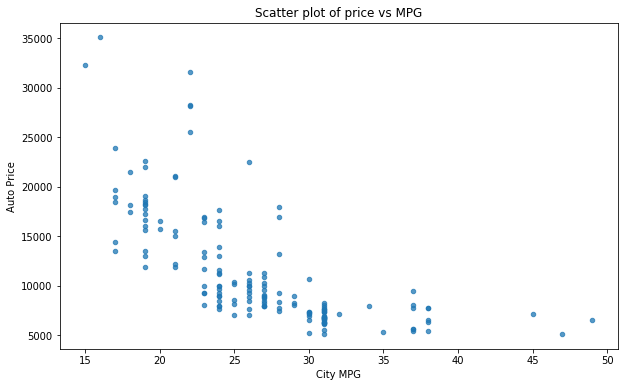

In [0]:
def scatterplot(df, title, xcol_name, ycol_name, xlabel=None, ylabel=None):
    fig = plt.figure(figsize=(10, 6)) # define plot area
    ax = fig.gca() # define axis                   
    df.plot(kind = 'scatter', x = xcol_name, y = ycol_name, ax = ax, alpha=0.75)
    ax.set_title(title) # Give the plot a main title
    if not xlabel:
        xlabel = xcol_name
    if not ylabel:
        ylabel = ycol_name
    ax.set_xlabel(xlabel) # Set text for the x axis
    ax.set_ylabel(ylabel); # Set text for y axis
    
scatterplot(df, title='Scatter plot of price vs MPG', xcol_name = 'city-mpg', ycol_name = 'price', xlabel = 'City MPG', ylabel = 'Auto Price');

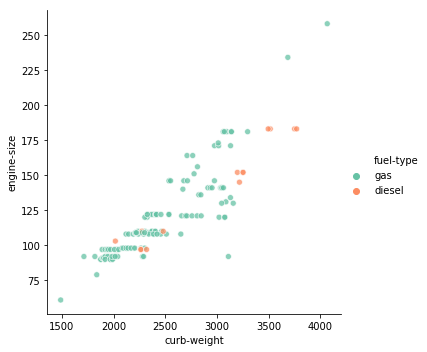

In [0]:
sns.relplot(x = 'curb-weight', y = 'engine-size', 
           data = df, 
           hue = "fuel-type", 
           palette="Set2", alpha=0.75
           );   

#### - Histogram


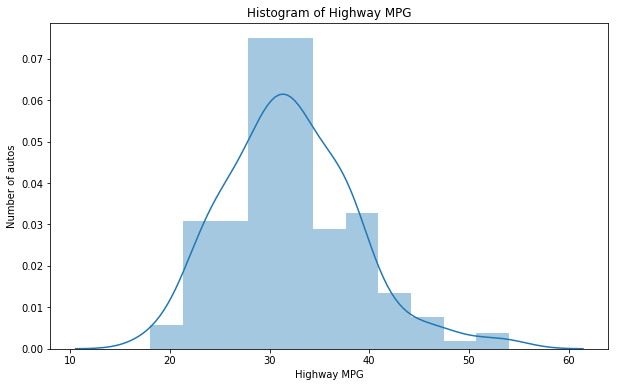

In [0]:
def hist_plot(df, col_name, title=None, xlabel=None, ylabel='Count'):
    fig = plt.figure(figsize=(10, 6)) # define plot area
    ax = fig.add_subplot(111) # add single subplot
    sns.distplot(df[col_name], ax=ax) # Use seaborn plot
    if not title:
        title = 'Histogram of {}'.format(col_name)
    ax.set_title(title) # Give the plot a main title
    if not xlabel:
        xlabel = colname
    ax.set_xlabel(xlabel) # Set text for the x axis
    ax.set_ylabel(ylabel)# Set text for y axis

hist_plot(df,'highway-mpg', 'Histogram of Highway MPG', 'Highway MPG', 'Number of autos')

#### - Density Plot


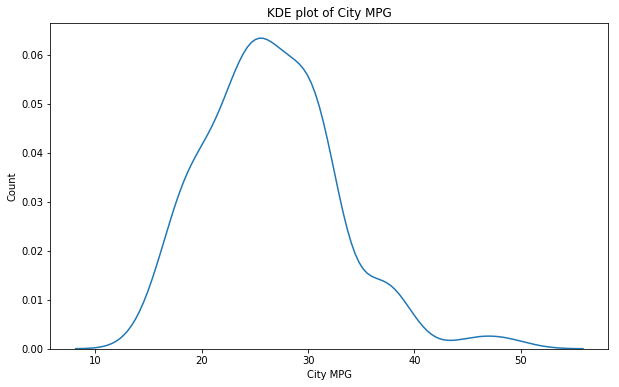

In [0]:
def density_plot(df, col_name, title=None, xlabel=None, ylabel='Count'):
    fig = plt.figure(figsize=(10, 6)) # define plot area
    ax = fig.add_subplot(111) # add single subplot
    sns.kdeplot(df[col_name], ax = ax, legend=False) # Use seaborn plot
    if not title:
        title = 'KDE plot of {}'.format(col_name)
    ax.set_title(title) # Give the plot a main title
    if not xlabel:
        xlabel = colname
    ax.set_xlabel(xlabel) # Set text for the x axis
    ax.set_ylabel(ylabel)# Set text for y axis
    
density_plot(df, 'city-mpg', 'KDE plot of City MPG', 'City MPG')

#### - Pairplot

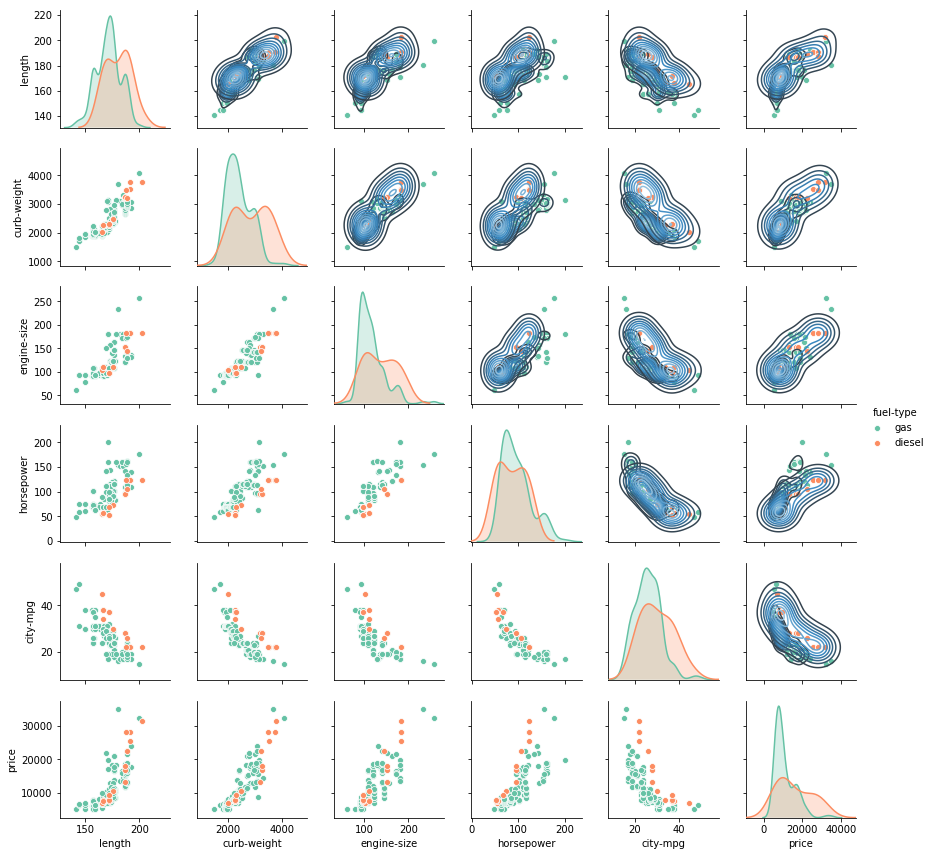

In [0]:
numerical_cols = ['length', 'curb-weight', 'engine-size', 'horsepower', 'city-mpg', 'price', 'fuel-type'] 
sns.pairplot(df[numerical_cols], hue='fuel-type', palette='Set2', diag_kind='kde', size=2).map_upper(sns.kdeplot, cmap='Blues_d')

#### - Jointplot

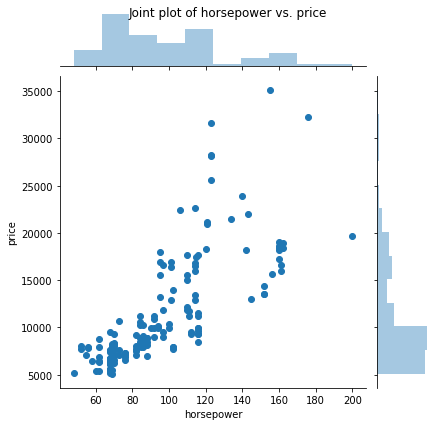

In [0]:
def joint_plot(df, col_name1, col_name2, title=None):
    sns.jointplot(x=col_name1, y=col_name2, data=df)
    if not title:
        title = 'Joint plot of {} vs. {}'.format(col_name1, col_name2)
    plt.suptitle(title)
    
joint_plot(df, 'horsepower', 'price')

#### Correlation Heatmaps

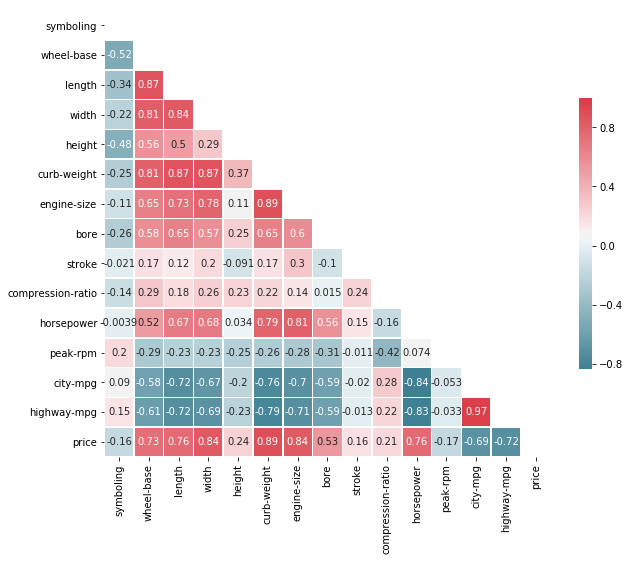

In [0]:
def correlation_heatmap(data=None, vmax=1, annot=True, corr_type='pearson'):
    if data is None:
        raise ValueError(
            "The parameter 'data' must be assigned a non-nil reference to a Pandas DataFrame")
    # Taken from the seaborn example at:
    # http://seaborn.pydata.org/examples/many_pairwise_correlations.html
    # Compute the correlation matrix
    corr = data.corr(corr_type)
    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    # Set up the matplotlib figure
    fig, axes = plt.subplots(figsize=(10, 10))
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=vmax, annot=annot, square=True,
                linewidths=.5, cbar_kws={"shrink": .5}, ax=axes)
    plt.show()
    plt.close()
    
correlation_heatmap(df)

#### - FiveThrityEight Style plot

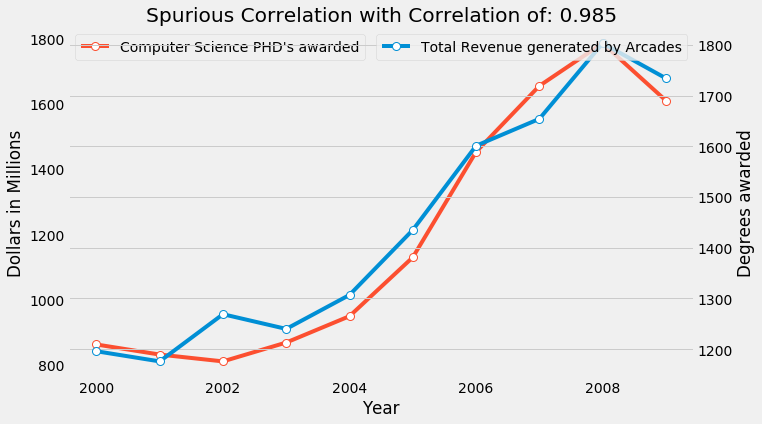

In [0]:
plt.style.use('fivethirtyeight')
data = {
    'year': list(range(2000, 2009+1)),
    'arcade_revenue': [1196, 1176, 1269, 1240, 1307, 1435, 1601, 1654, 1803, 1734],
    'cs_phds': [861, 830, 809, 867, 948, 1129, 1453, 1656, 1787, 1611]
}

df = pd.DataFrame(data)

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(df['year'], df['cs_phds'], label="Computer Science PHD's awarded", color='#fc4f30', marker='o', markerfacecolor = 'w', markersize=8)
ax1.set_ylabel("Dollars in Millions")
ax1.set_xlabel("Year")
ax1.grid(False)
ax1.legend(loc="upper left", )

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(df['year'], df['arcade_revenue'], label="Total Revenue generated by Arcades", marker='o', markerfacecolor = 'w', markersize=8)
ax2.set_ylabel("Degrees awarded")
ax2.tick_params(axis = 'y', which = 'major')
ax2.legend(loc="upper right")

plt.title("Spurious Correlation with Correlation of: 0.985")
plt.show()